## Problem Statement:

### 1) Try different values of support and confidence. Observe the change in number of rules for different support, confidence values.

### 2) Change the minimum length in apriori algorithm.

### 3) Visualize the obtained rules using different plots

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reding the csv file
book=pd.read_csv(r'E:\DS Assigment\Association Rules/book.csv')

In [3]:
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [4]:
#Shape 
book.shape

(2000, 11)

In [5]:
book.size

22000

In [6]:
#Checking of null values
book.isnull().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [7]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [8]:
book.std()

ChildBks     0.494159
YouthBks     0.431668
CookBks      0.495340
DoItYBks     0.450086
RefBks       0.410578
ArtBks       0.427797
GeogBks      0.447129
ItalCook     0.317282
ItalAtlas    0.188809
ItalArt      0.214874
Florence     0.311089
dtype: float64

In [9]:
book.mean()

ChildBks     0.4230
YouthBks     0.2475
CookBks      0.4310
DoItYBks     0.2820
RefBks       0.2145
ArtBks       0.2410
GeogBks      0.2760
ItalCook     0.1135
ItalAtlas    0.0370
ItalArt      0.0485
Florence     0.1085
dtype: float64

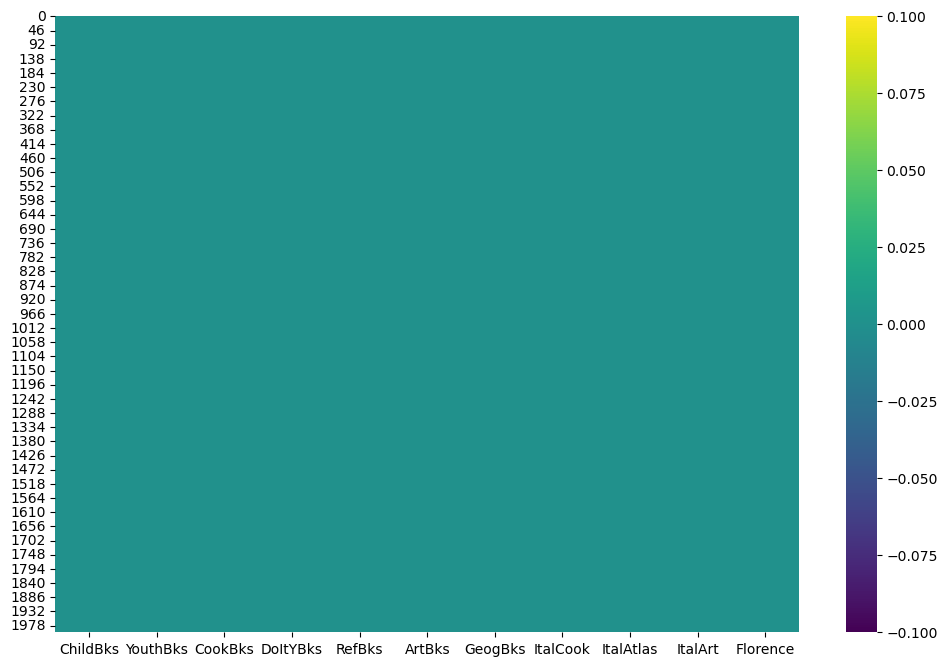

In [10]:
#Heat map
plt.figure(figsize=(12,8))
sns.heatmap(book.isnull(),cmap='viridis');

In [11]:
for i in book.columns:
    print(i)
    print(book[i].value_counts())
    print()

ChildBks
0    1154
1     846
Name: ChildBks, dtype: int64

YouthBks
0    1505
1     495
Name: YouthBks, dtype: int64

CookBks
0    1138
1     862
Name: CookBks, dtype: int64

DoItYBks
0    1436
1     564
Name: DoItYBks, dtype: int64

RefBks
0    1571
1     429
Name: RefBks, dtype: int64

ArtBks
0    1518
1     482
Name: ArtBks, dtype: int64

GeogBks
0    1448
1     552
Name: GeogBks, dtype: int64

ItalCook
0    1773
1     227
Name: ItalCook, dtype: int64

ItalAtlas
0    1926
1      74
Name: ItalAtlas, dtype: int64

ItalArt
0    1903
1      97
Name: ItalArt, dtype: int64

Florence
0    1783
1     217
Name: Florence, dtype: int64



In [12]:
book.value_counts()

ChildBks  YouthBks  CookBks  DoItYBks  RefBks  ArtBks  GeogBks  ItalCook  ItalAtlas  ItalArt  Florence
0         0         0        0         0       0       0        0         0          0        0           421
1         0         0        0         0       0       0        0         0          0        0           136
0         0         1        0         0       0       0        0         0          0        0           133
                    0        1         0       0       0        0         0          0        0            67
                             0         0       0       0        0         0          0        1            58
                                                                                                         ... 
1         0         1        1         1       1       0        0         1          1        1             1
0         0         1        1         1       1       1        0         0          0        0             1
1         0      

In [13]:
book.loc[:,:].sum()

ChildBks     846
YouthBks     495
CookBks      862
DoItYBks     564
RefBks       429
ArtBks       482
GeogBks      552
ItalCook     227
ItalAtlas     74
ItalArt       97
Florence     217
dtype: int64

In [14]:
# Product Frequency / Total Sales
first = pd.DataFrame(book.sum() / book.shape[0], columns = ["Support"]).sort_values("Support", ascending = False)
first

,Support
CookBks,0.4310
ChildBks,0.4230
DoItYBks,0.2820
GeogBks,0.2760
YouthBks,0.2475
ArtBks,0.2410
RefBks,0.2145
ItalCook,0.1135
Florence,0.1085
ItalArt,0.0485


### Visualizing the frequency for the different book categories

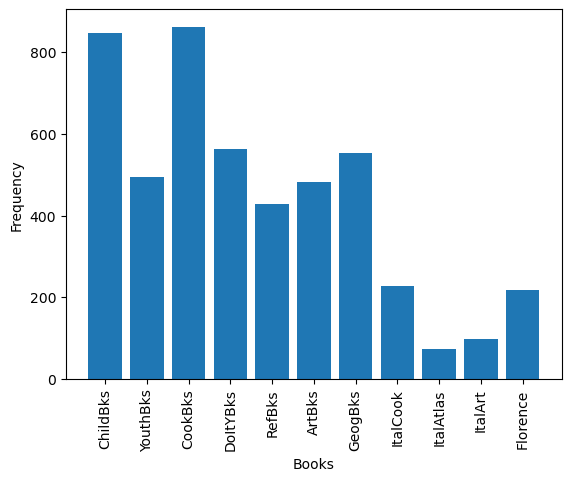

In [15]:
plt.bar(book.columns,book.sum(axis=0))
plt.xticks(rotation=90)
plt.xlabel('Books')
plt.ylabel('Frequency')
plt.show()

## Model 1

### Implementing an apiori algorithm

In [16]:
book_sales1=apriori(book,min_support=0.1,use_colnames=True)
book_sales1

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


### Constructing an association model, using lift as the evalution metric

In [17]:
rules1=association_rules(book_sales1,metric='lift')
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
96,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
97,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
98,(CookBks),"(GeogBks, ArtBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237


In [18]:
#Sorting in ascending order with respect to lift citeria
rules1.sort_values('lift',ascending=False,inplace=True)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
29,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
78,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
79,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
87,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
...,...,...,...,...,...,...,...,...,...
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
12,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678
13,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240


### Scatterplot for support and confidence for the first association rule, with respect to Lift criteria

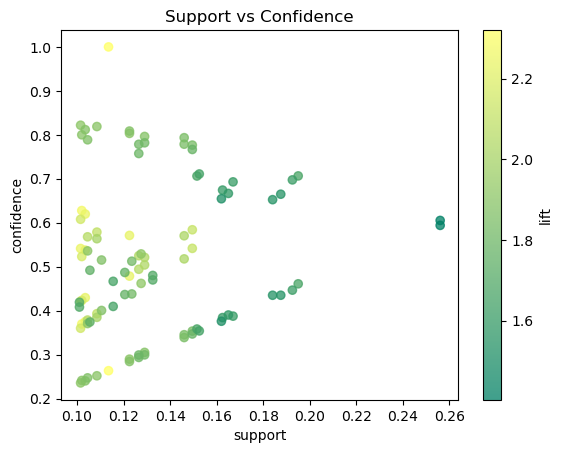

In [19]:
plt.scatter(rules1['support'], rules1['confidence'],c=rules1['lift'],cmap= 'summer',alpha=0.75)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
cbar=plt.colorbar()
cbar.set_label('lift')
plt.show()

### Scatter plot for support and lift for the association role,with respect to confidence criteria

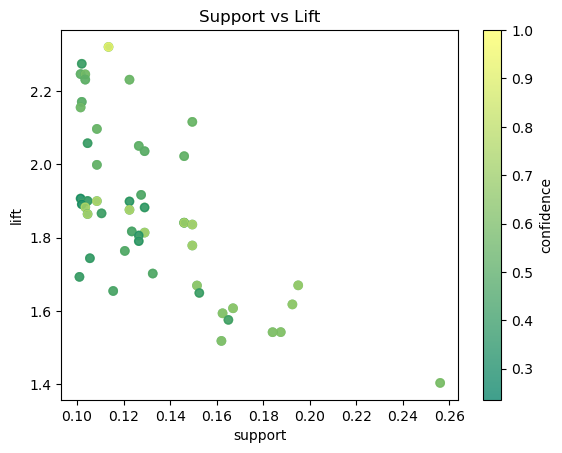

In [20]:
plt.scatter(rules1["support"], rules1["lift"],c=rules1['confidence'],cmap= 'summer',alpha=0.75)
plt.xlabel("support")
plt.ylabel("lift")
plt.title("Support vs Lift")
cbar=plt.colorbar()
cbar.set_label('confidence')
plt.show()

### Association rule for Childbooks

In [21]:
bookname='ChildBks'
rules1_ChildBks =(rules1.lift>1) & (rules1['antecedents'].astype(str).str.contains(bookname))
rules1.loc[rules1_ChildBks,["antecedents","consequents"]]

,antecedents,consequents
78,"(ArtBks, ChildBks)",(GeogBks)
52,"(CookBks, ChildBks)",(RefBks)
77,"(GeogBks, ChildBks)",(ArtBks)
66,"(CookBks, ChildBks)",(GeogBks)
72,"(DoItYBks, ChildBks)",(GeogBks)
59,"(CookBks, ChildBks)",(ArtBks)
40,"(CookBks, ChildBks)",(YouthBks)
48,"(CookBks, ChildBks)",(DoItYBks)
71,"(GeogBks, ChildBks)",(DoItYBks)
56,(ChildBks),"(CookBks, RefBks)"


### Association rule for YouthBooks

In [22]:
bookname='YouthBks'
rules1_YouthBks =(rules1.lift>1) & (rules1['antecedents'].astype(str).str.contains(bookname))
rules1.loc[rules1_YouthBks,["antecedents","consequents"]]

,antecedents,consequents
45,(YouthBks),"(CookBks, ChildBks)"
41,"(CookBks, YouthBks)",(ChildBks)
42,"(ChildBks, YouthBks)",(CookBks)
19,(YouthBks),(GeogBks)
17,(YouthBks),(ArtBks)
15,(YouthBks),(DoItYBks)
1,(YouthBks),(ChildBks)
13,(YouthBks),(CookBks)


### Association Rule for CookBooks

In [23]:
bookname='CookBks'
rules1_CookBks =(rules1.lift>1) & (rules1['antecedents'].astype(str).str.contains(bookname))
rules1.loc[rules1_CookBks,["antecedents","consequents"]]

,antecedents,consequents
28,(CookBks),(ItalCook)
82,"(DoItYBks, CookBks)",(ArtBks)
96,"(CookBks, ArtBks)",(GeogBks)
94,"(GeogBks, CookBks)",(ArtBks)
52,"(CookBks, ChildBks)",(RefBks)
84,"(CookBks, ArtBks)",(DoItYBks)
66,"(CookBks, ChildBks)",(GeogBks)
88,"(DoItYBks, CookBks)",(GeogBks)
59,"(CookBks, ChildBks)",(ArtBks)
40,"(CookBks, ChildBks)",(YouthBks)


### Association Rule for DoltyBooks

In [24]:
bookname='DoItYBks'
rules1_DoItYBks =(rules1.lift>1) & (rules1['antecedents'].astype(str).str.contains(bookname))
rules1.loc[rules1_DoItYBks,["antecedents","consequents"]]

,antecedents,consequents
82,"(DoItYBks, CookBks)",(ArtBks)
85,(DoItYBks),"(CookBks, ArtBks)"
88,"(DoItYBks, CookBks)",(GeogBks)
72,"(DoItYBks, ChildBks)",(GeogBks)
49,(DoItYBks),"(CookBks, ChildBks)"
91,(DoItYBks),"(GeogBks, CookBks)"
83,"(DoItYBks, ArtBks)",(CookBks)
74,(DoItYBks),"(GeogBks, ChildBks)"
89,"(GeogBks, DoItYBks)",(CookBks)
70,"(GeogBks, DoItYBks)",(ChildBks)


### Association Rule for RefBooks

In [25]:
bookname='RefBks'
rules1_RefBks =(rules1.lift>1) & (rules1['antecedents'].astype(str).str.contains(bookname))
rules1.loc[rules1_RefBks,["antecedents","consequents"]]

,antecedents,consequents
57,(RefBks),"(CookBks, ChildBks)"
53,"(CookBks, RefBks)",(ChildBks)
54,"(ChildBks, RefBks)",(CookBks)
37,(RefBks),(GeogBks)
31,(RefBks),(DoItYBks)
7,(RefBks),(ChildBks)
23,(RefBks),(CookBks)


### Association Rule for ArtsBooks

In [26]:
bookname='ArtBks'
rules1_ArtBks =(rules1.lift>1) & (rules1['antecedents'].astype(str).str.contains(bookname))
rules1.loc[rules1_ArtBks,["antecedents","consequents"]]

,antecedents,consequents
78,"(ArtBks, ChildBks)",(GeogBks)
87,(ArtBks),"(DoItYBks, CookBks)"
96,"(CookBks, ArtBks)",(GeogBks)
99,(ArtBks),"(GeogBks, CookBks)"
80,(ArtBks),"(GeogBks, ChildBks)"
84,"(CookBks, ArtBks)",(DoItYBks)
62,(ArtBks),"(CookBks, ChildBks)"
39,(ArtBks),(GeogBks)
83,"(DoItYBks, ArtBks)",(CookBks)
76,"(GeogBks, ArtBks)",(ChildBks)


### Association Rule for GeogBooks

In [27]:
bookname='GeogBks'
rules1_GeogBks =(rules1.lift>1) & (rules1['antecedents'].astype(str).str.contains(bookname))
rules1.loc[rules1_GeogBks,["antecedents","consequents"]]

,antecedents,consequents
79,(GeogBks),"(ArtBks, ChildBks)"
97,(GeogBks),"(CookBks, ArtBks)"
94,"(GeogBks, CookBks)",(ArtBks)
77,"(GeogBks, ChildBks)",(ArtBks)
67,(GeogBks),"(CookBks, ChildBks)"
93,(GeogBks),"(DoItYBks, CookBks)"
73,(GeogBks),"(DoItYBks, ChildBks)"
90,"(GeogBks, CookBks)",(DoItYBks)
38,(GeogBks),(ArtBks)
71,"(GeogBks, ChildBks)",(DoItYBks)


### Association Rule for ItalCook

In [28]:
bookname='ItalCook'
rules1_ItalCook =(rules1.lift>1) & (rules1['antecedents'].astype(str).str.contains(bookname))
rules1.loc[rules1_ItalCook,["antecedents","consequents"]]

,antecedents,consequents
29,(ItalCook),(CookBks)


### Association Rules for ItalAtlas

In [29]:
bookname='ItalAtlas'
rules1_ItalAtlas =(rules1.lift>1) & (rules1['antecedents'].astype(str).str.contains(bookname))
rules1.loc[rules1_ItalAtlas,["antecedents","consequents"]]

,antecedents,consequents


### Association Rules for Florence

In [30]:
bookname='Florence'
rules1_Florence =(rules1.lift>1) & (rules1['antecedents'].astype(str).str.contains(bookname))
rules1.loc[rules1_Florence,["antecedents","consequents"]]

,antecedents,consequents


## Model 2

### We will create other rules by taking different length in Apriori and different minimum support

In [31]:
book_sales2 = apriori(book, min_support=0.15, use_colnames=True)
book_sales2

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1650,"(ChildBks, YouthBks)"
8,0.2560,"(CookBks, ChildBks)"
9,0.1840,"(DoItYBks, ChildBks)"


In [32]:
rules2 = association_rules(book_sales2, metric="lift", min_threshold=0.8)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
5,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
6,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
7,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
8,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
9,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464


In [33]:
rules2.sort_values('lift',ascending = False,inplace=True)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
11,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211
10,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
6,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
7,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
17,(RefBks),(CookBks),0.2145,0.4310,0.1525,0.710956,1.649549,0.060050,1.968556
16,(CookBks),(RefBks),0.4310,0.2145,0.1525,0.353828,1.649549,0.060050,1.215621
20,(GeogBks),(CookBks),0.2760,0.4310,0.1925,0.697464,1.618245,0.073544,1.880766
21,(CookBks),(GeogBks),0.4310,0.2760,0.1925,0.446636,1.618245,0.073544,1.308361
18,(CookBks),(ArtBks),0.4310,0.2410,0.1670,0.387471,1.607763,0.063129,1.239125
19,(ArtBks),(CookBks),0.2410,0.4310,0.1670,0.692946,1.607763,0.063129,1.853095


### Scatter plot for support and confidence of second association rule

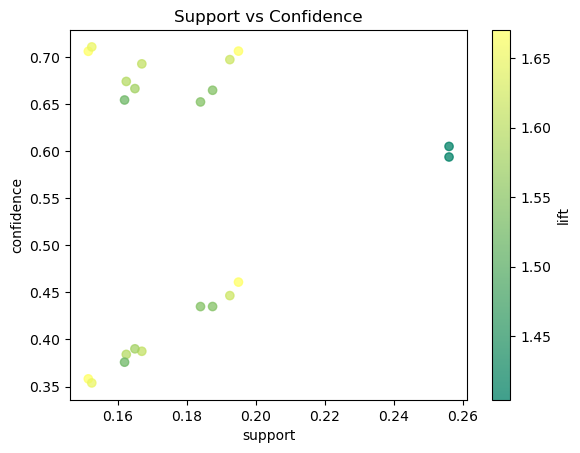

In [34]:
plt.scatter(rules2['support'], rules2['confidence'],c=rules2['lift'],cmap= 'summer',alpha=0.75)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
cbar=plt.colorbar()
cbar.set_label('lift')
plt.show()

### Scatter plot for support and lift of second association rule

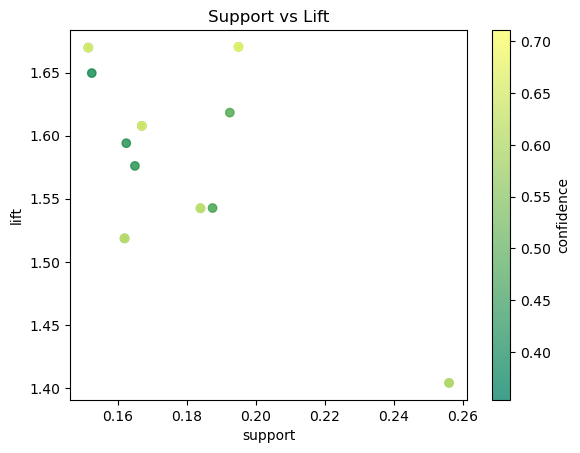

In [35]:
plt.scatter(rules2["support"], rules2["lift"],c=rules2['confidence'],cmap= 'summer',alpha=0.75)
plt.xlabel("support")
plt.ylabel("lift")
plt.title("Support vs Lift")
cbar=plt.colorbar()
cbar.set_label('confidence')
plt.show()

## Model 3

### We will create other rules by taking different length in Apriori

In [36]:
book_sales3 = apriori(book, min_support=0.05, use_colnames=True)
book_sales3

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(DoItYBks, CookBks, GeogBks, YouthBks)"
96,0.0560,"(GeogBks, CookBks, ArtBks, YouthBks)"
97,0.0650,"(DoItYBks, CookBks, ArtBks, GeogBks)"
98,0.0510,"(GeogBks, ChildBks, DoItYBks, YouthBks, CookBks)"


In [37]:
rules3 = association_rules(book_sales3, metric="lift", min_threshold=0.8)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
657,(GeogBks),"(DoItYBks, CookBks, ArtBks, ChildBks)",0.2760,0.0820,0.0535,0.193841,2.363910,0.030868,1.138733
658,(ArtBks),"(GeogBks, DoItYBks, CookBks, ChildBks)",0.2410,0.0890,0.0535,0.221992,2.494289,0.032051,1.170939
659,(ChildBks),"(GeogBks, DoItYBks, CookBks, ArtBks)",0.4230,0.0650,0.0535,0.126478,1.945808,0.026005,1.070379
660,(DoItYBks),"(GeogBks, CookBks, ArtBks, ChildBks)",0.2820,0.0835,0.0535,0.189716,2.272052,0.029953,1.131085


### Sorting value based on the lift metric

In [38]:
rules3.sort_values('lift',ascending = False,inplace=True)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
181,"(CookBks, YouthBks)",(ItalCook),0.1620,0.1135,0.0590,0.364198,3.208789,0.040613,1.394301
184,(ItalCook),"(CookBks, YouthBks)",0.1135,0.1620,0.0590,0.519824,3.208789,0.040613,1.745193
508,"(GeogBks, CookBks)","(ItalCook, ChildBks)",0.1925,0.0850,0.0525,0.272727,3.208556,0.036137,1.258125
513,"(ItalCook, ChildBks)","(GeogBks, CookBks)",0.0850,0.1925,0.0525,0.617647,3.208556,0.036137,2.111923
509,"(GeogBks, ItalCook)","(CookBks, ChildBks)",0.0640,0.2560,0.0525,0.820312,3.204346,0.036116,4.140522
...,...,...,...,...,...,...,...,...,...
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
15,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
14,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240


### Scatter plot- Support vs confidence

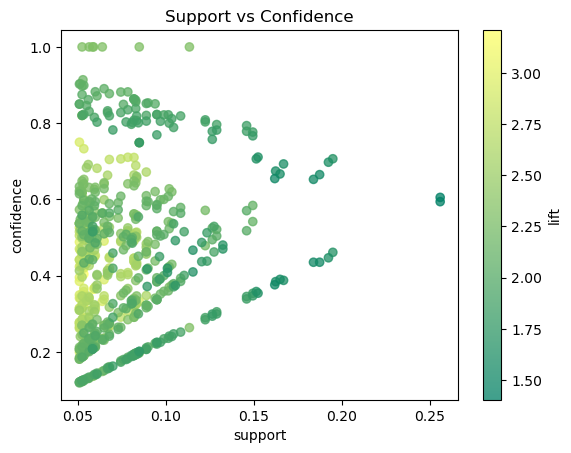

In [39]:
plt.scatter(rules3['support'], rules3['confidence'],c=rules3['lift'],cmap= 'summer',alpha=0.75)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
cbar=plt.colorbar()
cbar.set_label('lift')
plt.show()

### Scatter plot- Support vs lift

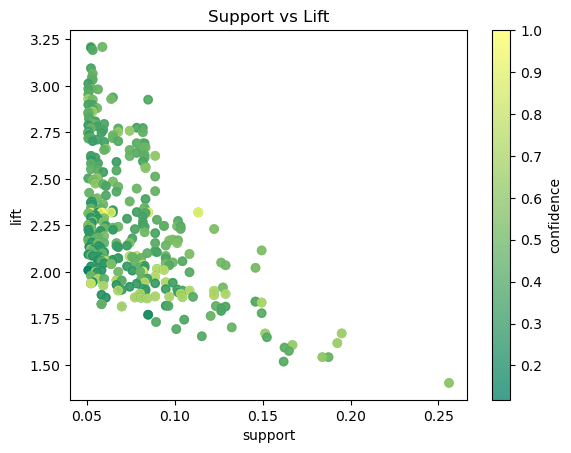

In [40]:
plt.scatter(rules3["support"], rules3["lift"],c=rules3['confidence'],cmap= 'summer',alpha=0.75)
plt.xlabel("support")
plt.ylabel("lift")
plt.title("Support vs Lift")
cbar=plt.colorbar()
cbar.set_label('confidence')
plt.show()

## Conclusion:


### From all the above association rules that is created, the rule 3 has a higher lift metric, thereby showing more associations to all the books. Thus, we can predict the association rules with last model, rule3